In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [275]:
df=pd.read_csv('train.csv')

In [276]:
df.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [277]:
df.shape

(1628, 29)

In [278]:
df.drop(['Id'],axis=1,inplace=True)

In [279]:
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

In [280]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

In [281]:
df['BusinessTravel'] = labelencoder.fit_transform(df['BusinessTravel'])
df['Department'] = labelencoder.fit_transform(df['Department'])
df['EducationField'] = labelencoder.fit_transform(df['EducationField'])
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['JobRole'] = labelencoder.fit_transform(df['JobRole'])
df['MaritalStatus'] = labelencoder.fit_transform(df['MaritalStatus'])
df['OverTime'] = labelencoder.fit_transform(df['OverTime'])

In [282]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [283]:
main_df=df.copy()

In [284]:
main_df.corr()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
Age,1.000000,-0.200596,0.008455,0.043658,0.020658,0.219237,-0.118817,0.024386,0.001950,0.017287,...,0.002982,0.126257,0.675578,0.004789,0.355438,0.266728,0.222113,0.263792,0.019341,NaN
Attrition,-0.200596,1.000000,-0.029573,0.099875,0.109224,-0.041390,0.046867,-0.051512,-0.111746,0.024573,...,0.010202,-0.175496,-0.262922,-0.105663,-0.230061,-0.269408,-0.050379,-0.222752,0.103379,NaN
BusinessTravel,0.008455,-0.029573,1.000000,0.009503,-0.036679,0.085965,0.066068,-0.028489,0.078620,-0.021527,...,-0.046572,-0.004431,0.005841,0.000637,-0.006237,0.009472,-0.031309,-0.030925,-0.000500,NaN
Department,0.043658,0.099875,0.009503,1.000000,-0.041649,0.014336,-0.006380,-0.003568,-0.028180,-0.006672,...,-0.038672,-0.080669,0.035860,0.081979,0.045319,0.069065,0.072561,0.020990,-0.044798,NaN
DistanceFromHome,0.020658,0.109224,-0.036679,-0.041649,1.000000,0.023945,-0.081273,0.051568,-0.046390,-0.013860,...,0.071457,0.029378,0.029289,-0.032038,-0.030392,-0.010607,0.004460,-0.004135,-0.036109,NaN
Education,0.219237,-0.041390,0.085965,0.014336,0.023945,1.000000,-0.079994,0.077561,-0.065041,0.002492,...,-0.036204,0.042585,0.175662,-0.043272,0.145911,0.076579,0.076430,0.121981,0.000223,NaN
EducationField,-0.118817,0.046867,0.066068,-0.006380,-0.081273,-0.079994,1.000000,-0.095231,0.094575,0.060727,...,0.007964,-0.078527,-0.058897,0.098403,-0.045987,-0.020335,-0.050683,-0.028599,-0.017567,NaN
EmployeeNumber,0.024386,-0.051512,-0.028489,-0.003568,0.051568,0.077561,-0.095231,1.000000,0.001229,-0.002182,...,-0.049489,0.126275,0.032632,-0.008625,0.045468,0.019844,0.018699,0.047598,-0.009926,NaN
EnvironmentSatisfaction,0.001950,-0.111746,0.078620,-0.028180,-0.046390,-0.065041,0.094575,0.001229,1.000000,0.019488,...,-0.041427,-0.006479,-0.019005,0.020531,0.000685,0.008028,0.014325,0.002457,-0.011557,NaN
Gender,0.017287,0.024573,-0.021527,-0.006672,-0.013860,0.002492,0.060727,-0.002182,0.019488,1.000000,...,-0.030559,0.003657,-0.005934,-0.006311,-0.036279,-0.039988,0.000826,-0.036222,0.063358,NaN


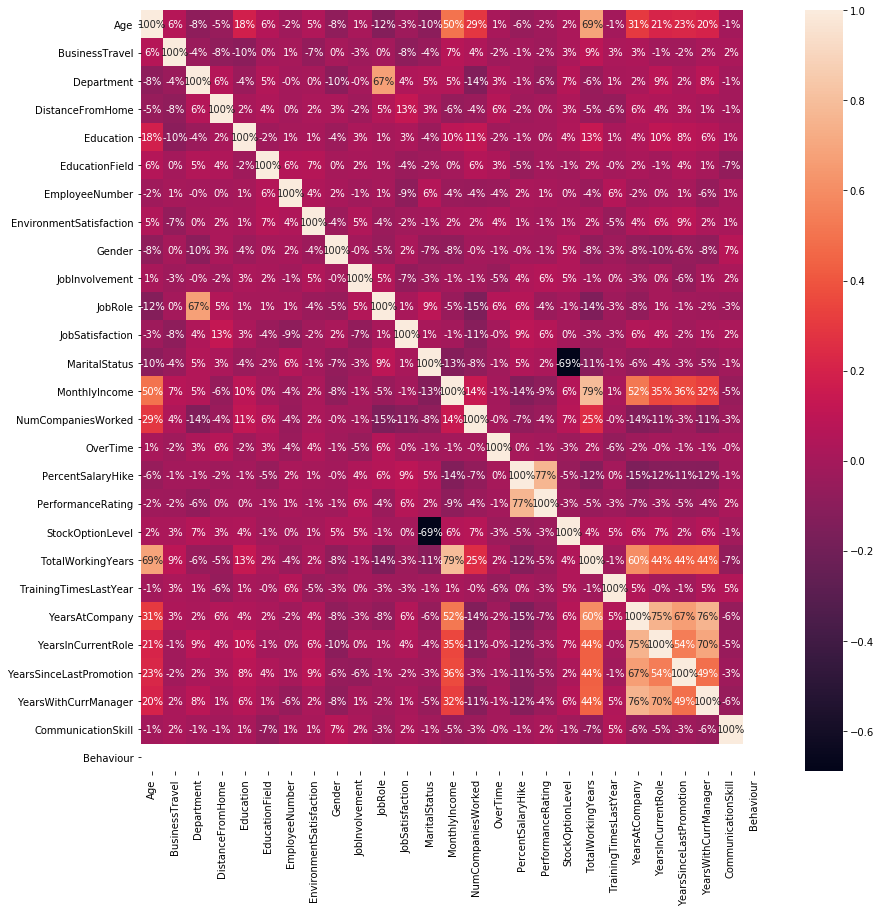

In [266]:
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [285]:
test_df=pd.read_csv('formulatedtest.csv')

In [286]:
test_df.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,2,1,9,3,3,377,4,1,...,4,1,5,3,5,2,0,4,5,1
1,2,31,2,2,6,4,3,653,1,1,...,4,2,13,4,7,7,5,7,3,1
2,3,37,2,1,6,3,3,474,3,1,...,3,2,13,2,7,7,6,7,4,1
3,4,42,2,1,1,2,1,827,4,0,...,3,1,8,4,4,3,0,2,5,1
4,5,45,0,1,4,2,1,972,3,1,...,3,0,9,5,9,7,0,8,2,1


In [287]:
test_df.shape

(470, 28)

In [288]:
final_df=pd.concat([df,test_df],axis=0)

In [289]:
final_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,Id
0,30,0.0,0,1,2,3,3,571,3,0,...,0,12,2,11,7,6,7,4,1,NaN
1,36,0.0,2,1,12,4,1,1614,3,0,...,2,7,2,3,2,1,1,2,1,NaN
2,55,1.0,2,2,2,1,3,842,3,1,...,0,12,3,9,7,7,3,5,1,NaN
3,39,0.0,2,1,24,1,1,2014,1,1,...,0,18,2,7,7,1,7,4,1,NaN
4,37,0.0,2,1,3,3,4,689,3,1,...,1,10,2,10,7,7,8,1,1,NaN


In [290]:
final_df.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,Id
465,32,NaN,2,1,2,4,1,1692,4,1,...,0,1,2,1,0,0,0,5,1,466.0
466,18,NaN,1,2,3,2,3,1624,2,0,...,0,0,2,0,0,0,0,2,1,467.0
467,24,NaN,2,1,23,3,3,639,2,1,...,2,6,3,6,5,1,4,1,1,468.0
468,31,NaN,2,1,23,3,3,367,2,1,...,1,10,2,9,0,7,8,3,1,469.0
469,36,NaN,2,1,5,4,1,1651,2,0,...,2,9,6,3,2,0,2,5,1,470.0


In [291]:
final_df.shape

(2098, 29)

In [292]:
final_df.drop(['EmployeeNumber'],axis=1)
final_df.drop(['MaritalStatus'],axis=1)
final_df.drop(['Behaviour'],axis=1)
final_df.drop(['Id'],axis=1)

final_df.drop(['YearsWithCurrManager'],axis=1)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,CommunicationSkill,Behaviour,Id
0,30,0.0,0,1,2,3,3,571,3,0,...,3,0,12,2,11,7,6,4,1,NaN
1,36,0.0,2,1,12,4,1,1614,3,0,...,3,2,7,2,3,2,1,2,1,NaN
2,55,1.0,2,2,2,1,3,842,3,1,...,3,0,12,3,9,7,7,5,1,NaN
3,39,0.0,2,1,24,1,1,2014,1,1,...,3,0,18,2,7,7,1,4,1,NaN
4,37,0.0,2,1,3,3,4,689,3,1,...,3,1,10,2,10,7,7,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,32,NaN,2,1,2,4,1,1692,4,1,...,3,0,1,2,1,0,0,5,1,466.0
466,18,NaN,1,2,3,2,3,1624,2,0,...,3,0,0,2,0,0,0,2,1,467.0
467,24,NaN,2,1,23,3,3,639,2,1,...,3,2,6,3,6,5,1,1,1,468.0
468,31,NaN,2,1,23,3,3,367,2,1,...,4,1,10,2,9,0,7,3,1,469.0


In [293]:
final_df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,Id
0,30,0.0,0,1,2,3,3,571,3,0,...,0,12,2,11,7,6,7,4,1,NaN
1,36,0.0,2,1,12,4,1,1614,3,0,...,2,7,2,3,2,1,1,2,1,NaN
2,55,1.0,2,2,2,1,3,842,3,1,...,0,12,3,9,7,7,3,5,1,NaN
3,39,0.0,2,1,24,1,1,2014,1,1,...,0,18,2,7,7,1,7,4,1,NaN
4,37,0.0,2,1,3,3,4,689,3,1,...,1,10,2,10,7,7,8,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,32,NaN,2,1,2,4,1,1692,4,1,...,0,1,2,1,0,0,0,5,1,466.0
466,18,NaN,1,2,3,2,3,1624,2,0,...,0,0,2,0,0,0,0,2,1,467.0
467,24,NaN,2,1,23,3,3,639,2,1,...,2,6,3,6,5,1,4,1,1,468.0
468,31,NaN,2,1,23,3,3,367,2,1,...,1,10,2,9,0,7,8,3,1,469.0


In [294]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [295]:
final_df=final_df.drop(['Id'],axis = 1)

In [296]:
final_df= final_df.drop(['Behaviour'],axis = 1)

In [297]:
final_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
0,30,0.0,0,1,2,3,3,571,3,0,...,14,3,0,12,2,11,7,6,7,4
1,36,0.0,2,1,12,4,1,1614,3,0,...,12,3,2,7,2,3,2,1,1,2
2,55,1.0,2,2,2,1,3,842,3,1,...,16,3,0,12,3,9,7,7,3,5
3,39,0.0,2,1,24,1,1,2014,1,1,...,13,3,0,18,2,7,7,1,7,4
4,37,0.0,2,1,3,3,4,689,3,1,...,15,3,1,10,2,10,7,7,8,1


In [298]:
final_df.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
465,32,NaN,2,1,2,4,1,1692,4,1,...,12,3,0,1,2,1,0,0,0,5
466,18,NaN,1,2,3,2,3,1624,2,0,...,12,3,0,0,2,0,0,0,0,2
467,24,NaN,2,1,23,3,3,639,2,1,...,11,3,2,6,3,6,5,1,4,1
468,31,NaN,2,1,23,3,3,367,2,1,...,21,4,1,10,2,9,0,7,8,3
469,36,NaN,2,1,5,4,1,1651,2,0,...,12,3,2,9,6,3,2,0,2,5


In [299]:
final_df.shape

(2098, 27)

In [300]:
df_Train=final_df.iloc[:1628,:]
df_Test=final_df.iloc[1628:,:]

In [301]:
df_Train.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
0,30,0.0,0,1,2,3,3,571,3,0,...,14,3,0,12,2,11,7,6,7,4
1,36,0.0,2,1,12,4,1,1614,3,0,...,12,3,2,7,2,3,2,1,1,2
2,55,1.0,2,2,2,1,3,842,3,1,...,16,3,0,12,3,9,7,7,3,5
3,39,0.0,2,1,24,1,1,2014,1,1,...,13,3,0,18,2,7,7,1,7,4
4,37,0.0,2,1,3,3,4,689,3,1,...,15,3,1,10,2,10,7,7,8,1


In [302]:
df_Train.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
1623,42,1.0,1,1,19,3,3,752,3,1,...,12,3,0,7,2,2,2,2,2,3
1624,55,1.0,2,2,2,1,3,842,3,1,...,16,3,0,12,3,9,7,7,3,5
1625,25,1.0,2,2,9,2,1,1439,1,1,...,12,3,0,6,2,3,2,2,2,5
1626,29,1.0,2,0,13,3,0,1844,1,1,...,15,3,3,4,3,2,2,2,0,5
1627,29,1.0,2,1,18,1,3,315,3,1,...,13,3,0,4,3,4,3,0,1,2


In [316]:
df_Train.shape

(1628, 27)

In [317]:
df_Test.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
0,28,NaN,2,1,9,3,3,377,4,1,...,23,4,1,5,3,5,2,0,4,5
1,31,NaN,2,2,6,4,3,653,1,1,...,22,4,2,13,4,7,7,5,7,3
2,37,NaN,2,1,6,3,3,474,3,1,...,13,3,2,13,2,7,7,6,7,4
3,42,NaN,2,1,1,2,1,827,4,0,...,13,3,1,8,4,4,3,0,2,5
4,45,NaN,0,1,4,2,1,972,3,1,...,12,3,0,9,5,9,7,0,8,2


In [318]:
df_Test.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
465,32,NaN,2,1,2,4,1,1692,4,1,...,12,3,0,1,2,1,0,0,0,5
466,18,NaN,1,2,3,2,3,1624,2,0,...,12,3,0,0,2,0,0,0,0,2
467,24,NaN,2,1,23,3,3,639,2,1,...,11,3,2,6,3,6,5,1,4,1
468,31,NaN,2,1,23,3,3,367,2,1,...,21,4,1,10,2,9,0,7,8,3
469,36,NaN,2,1,5,4,1,1651,2,0,...,12,3,2,9,6,3,2,0,2,5


In [319]:
df_Test.shape

(470, 27)

In [320]:
df_Test.dtypes

Age                          int64
Attrition                  float64
BusinessTravel               int64
Department                   int64
DistanceFromHome             int64
Education                    int64
EducationField               int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                       int64
JobInvolvement               int64
JobRole                      int64
JobSatisfaction              int64
MaritalStatus                int64
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                     int64
PercentSalaryHike            int64
PerformanceRating            int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
CommunicationSkill           int64
dtype: object

In [321]:
X_train = df_Train.drop(['Attrition'],axis=1)
y_train = df_Train['Attrition']

In [322]:
X_train.shape

(1628, 26)

In [323]:
y_train.tail()

1623    1.0
1624    1.0
1625    1.0
1626    1.0
1627    1.0
Name: Attrition, dtype: float64

In [324]:
y_train.shape

(1628,)

In [339]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [340]:
clf=RandomForestClassifier()

In [341]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [342]:
a=df_Test.drop(['Attrition'],axis=1)

In [343]:
target= df_Test['Attrition']


In [344]:
target

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
465   NaN
466   NaN
467   NaN
468   NaN
469   NaN
Name: Attrition, Length: 470, dtype: float64

In [345]:
y_pred=clf.predict_proba(a)

In [346]:
y_pred

array([[0.94, 0.06],
       [0.93, 0.07],
       [0.89, 0.11],
       [0.74, 0.26],
       [0.95, 0.05],
       [0.91, 0.09],
       [0.3 , 0.7 ],
       [0.89, 0.11],
       [0.85, 0.15],
       [0.93, 0.07],
       [0.96, 0.04],
       [0.81, 0.19],
       [0.88, 0.12],
       [0.99, 0.01],
       [0.96, 0.04],
       [0.94, 0.06],
       [0.66, 0.34],
       [0.82, 0.18],
       [0.83, 0.17],
       [0.97, 0.03],
       [0.95, 0.05],
       [0.42, 0.58],
       [0.84, 0.16],
       [0.94, 0.06],
       [0.9 , 0.1 ],
       [1.  , 0.  ],
       [0.93, 0.07],
       [0.91, 0.09],
       [0.18, 0.82],
       [0.91, 0.09],
       [0.96, 0.04],
       [0.91, 0.09],
       [0.79, 0.21],
       [0.71, 0.29],
       [0.97, 0.03],
       [0.94, 0.06],
       [0.91, 0.09],
       [0.78, 0.22],
       [0.87, 0.13],
       [0.79, 0.21],
       [0.25, 0.75],
       [0.79, 0.21],
       [0.89, 0.11],
       [0.87, 0.13],
       [0.94, 0.06],
       [0.93, 0.07],
       [0.79, 0.21],
       [0.77,

In [347]:
pred=pd.DataFrame(y_pred)

In [348]:
pre= pred[1]

In [337]:
sub_df=pd.read_csv('sample_submission.csv')

In [229]:
datasets=pd.concat([sub_df['Id'],pre],axis=1)
datasets.columns=['Id','Attrition']
datasets.to_csv('sample_submission.csv',index=False)


In [230]:
p = pd.read_csv('sample_submission.csv')

In [231]:
p

,Id,Attrition
0,1,0.11
1,2,0.01
2,3,0.13
3,4,0.19
4,5,0.07
...,...,...
465,466,0.48
466,467,0.76
467,468,0.46
468,469,0.15
